<a href="https://colab.research.google.com/github/gabryellesoares/NLP/blob/main/Classifica%C3%A7%C3%A3o_de_S%C3%A1tiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Sátiras

* Gabryelle Soares - 116210883

In [ ]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')
sns.set(color_codes=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv_satiras_reais.csv")
df.head()

,title,text,label
0,crise e tao grande que nem tiozao do pave fez...,a familia guimaraes passou a noite de natal pe...,satire
1,nao me representam diz jesus sobre intolerant...,uma menina de 11 anos apedrejada ao sair de um...,satire
2,marina silva e heloisa helena montam novo par...,insatisfeitas com seus partidos com as siglas ...,satire
3,dez propostas que podem realmente mudar o brasil,o instituto nupal nucleo de pesquisas da ameri...,satire
4,apresentadora do cidade alerta bahia dara cur...,assassinatos sequestros mortes violentas. nen...,satire


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


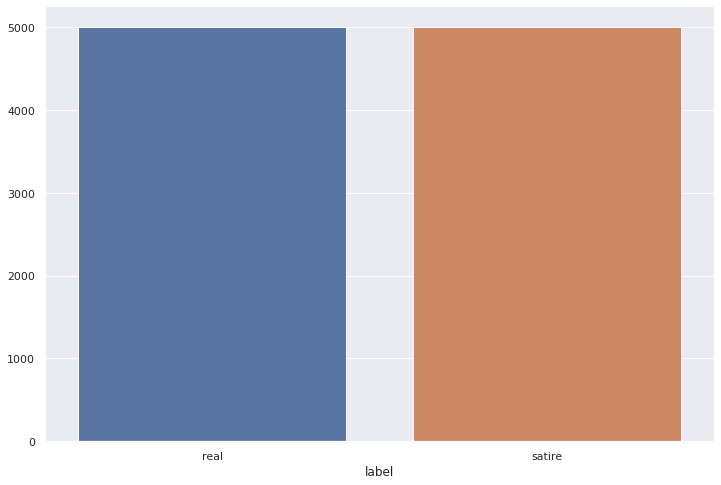

In [ ]:
dist = df.groupby(["label"]).size()

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(dist.keys(), dist.values);

# TF

## Títulos

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(stop_words=stopwords.words('portuguese'), ngram_range=(1,2), tokenizer=token.tokenize, min_df=5, max_df=0.8)
title_counts = cv.fit_transform(df['title'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amos', 'at', 'est', 'estiv', 'f', 'h', 'houv', 'j', 'm', 'n', 'nhamos', 'ramos', 's', 'ser', 'ssemos', 't', 'tamb', 'ter', 'tiv', 'vamos', 'voc'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
title_counts.shape

(10000, 3659)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(title_counts, df['label'], test_size=0.25, random_state=5)

### Naïve Bayes: verificando a acurácia


In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MNB_predicted = MNB.predict(X_test)
MNB_accuracy_score = metrics.accuracy_score(MNB_predicted, Y_test)

print(str('{:04.2f}'.format(MNB_accuracy_score * 100)) + '%')

86.96%


### Logistic Regression: verificando a acurácia

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LR_predicted = LR.predict(X_test)
LR_accuracy_score = metrics.accuracy_score(LR_predicted, Y_test)

print(str('{:04.2f}'.format(LR_accuracy_score * 100)) + '%')

86.72%


## Textos

In [ ]:
cv2 = CountVectorizer(stop_words=stopwords.words('portuguese'), ngram_range = (1,2), tokenizer=token.tokenize, min_df=10, max_df=0.8)
text_counts = cv2.fit_transform(df['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amos', 'at', 'est', 'estiv', 'f', 'h', 'houv', 'j', 'm', 'n', 'nhamos', 'ramos', 's', 'ser', 'ssemos', 't', 'tamb', 'ter', 'tiv', 'vamos', 'voc'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
text_counts.shape

(10000, 24969)

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(text_counts, df['label'], test_size=0.25, random_state=5)

### Naïve Bayes: verificando a acurácia

In [ ]:
MNB2 = MultinomialNB()
MNB2.fit(X_train2, Y_train2)

MNB_predicted2 = MNB2.predict(X_test2)
MNB_accuracy_score2 = metrics.accuracy_score(MNB_predicted2, Y_test2)

print(str('{:04.2f}'.format(MNB_accuracy_score2 * 100)) + '%')

95.72%


### Logistic Regression: verificando a acurácia

In [ ]:
LR2 = LogisticRegression()
LR2.fit(X_train2, Y_train2)

LR_predicted2 = LR2.predict(X_test2)
LR_accuracy_score2 = metrics.accuracy_score(LR_predicted2, Y_test2)

print(str('{:04.2f}'.format(LR_accuracy_score2 * 100)) + '%')

98.28%


## Títulos + textos

In [ ]:
cv3 = CountVectorizer(stop_words=stopwords.words('portuguese'), ngram_range=(1,2), tokenizer=token.tokenize, min_df=10, max_df=0.8)
title_text_counts = cv3.fit_transform(df['title'] + " " + df['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amos', 'at', 'est', 'estiv', 'f', 'h', 'houv', 'j', 'm', 'n', 'nhamos', 'ramos', 's', 'ser', 'ssemos', 't', 'tamb', 'ter', 'tiv', 'vamos', 'voc'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
title_text_counts.shape

(10000, 25659)

In [ ]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(title_text_counts, df['label'], test_size=0.25, random_state=5)

### Naïve Bayes: verificando a acurácia

In [ ]:
MNB3 = MultinomialNB()
MNB3.fit(X_train3, Y_train3)

MNB_predicted3 = MNB3.predict(X_test3)
MNB_accuracy_score3 = metrics.accuracy_score(MNB_predicted3, Y_test3)

print(str('{:04.2f}'.format(MNB_accuracy_score3 * 100)) + '%')

95.92%


### Logistic Regression: verificando a acurácia

In [ ]:
LR3 = LogisticRegression()
LR3.fit(X_train3, Y_train3)

LR_predicted3 = LR3.predict(X_test3)
LR_accuracy_score3 = metrics.accuracy_score(LR_predicted3, Y_test3)

print(str('{:04.2f}'.format(LR_accuracy_score3 * 100)) + '%')

98.24%


# TF-IDF

## Títulos

In [ ]:
tfv = TfidfVectorizer(stop_words=stopwords.words('portuguese'), ngram_range=(1,3), max_features=None, tokenizer=token.tokenize, min_df=5, max_df=0.8)

tfv_title_counts = tfv.fit_transform(df['title'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amos', 'at', 'est', 'estiv', 'f', 'h', 'houv', 'j', 'm', 'n', 'nhamos', 'ramos', 's', 'ser', 'ssemos', 't', 'tamb', 'ter', 'tiv', 'vamos', 'voc'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
tfv_title_counts.shape

(10000, 3696)

In [ ]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(tfv_title_counts, df['label'], test_size=0.25, random_state=5)

### Naïve Bayes: verificando a acurácia

In [ ]:
MNB4 = MultinomialNB()
MNB4.fit(X_train4, Y_train4)

MNB_predicted4 = MNB4.predict(X_test4)
MNB_accuracy_score4 = metrics.accuracy_score(MNB_predicted4, Y_test4)

print(str('{:04.2f}'.format(MNB_accuracy_score4 * 100)) + '%')

86.00%


### Logistic Regression: verificando a acurácia

In [ ]:
LR4 = LogisticRegression()
LR4.fit(X_train4, Y_train4)

LR_predicted4 = LR4.predict(X_test4)
LR_accuracy_score4 = metrics.accuracy_score(LR_predicted4, Y_test4)

print(str('{:04.2f}'.format(LR_accuracy_score4 * 100)) + '%')

86.24%


## Textos

In [ ]:
tfv2 = TfidfVectorizer(stop_words=stopwords.words('portuguese'), ngram_range=(1,3), max_features=None, tokenizer=token.tokenize, min_df=10, max_df=0.8)

tfv_text_counts = tfv2.fit_transform(df['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amos', 'at', 'est', 'estiv', 'f', 'h', 'houv', 'j', 'm', 'n', 'nhamos', 'ramos', 's', 'ser', 'ssemos', 't', 'tamb', 'ter', 'tiv', 'vamos', 'voc'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
tfv_text_counts.shape

(10000, 27594)

In [ ]:
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(text_counts, df['label'], test_size=0.25, random_state=5)

### Naïve Bayes: verificando a acurácia

In [ ]:
MNB5 = MultinomialNB()
MNB5.fit(X_train5, Y_train5)

MNB_predicted5 = MNB5.predict(X_test5)
MNB_accuracy_score5 = metrics.accuracy_score(MNB_predicted5, Y_test5)

print(str('{:04.2f}'.format(MNB_accuracy_score5 * 100)) + '%')

95.72%


### Logistic Regression: verificando a acurácia

In [ ]:
LR5 = LogisticRegression()
LR5.fit(X_train5, Y_train5)

LR_predicted5 = LR5.predict(X_test5)
LR_accuracy_score5 = metrics.accuracy_score(LR_predicted5, Y_test5)

print(str('{:04.2f}'.format(LR_accuracy_score5 * 100)) + '%')

98.28%


## Títulos + textos

In [ ]:
tfv3 = TfidfVectorizer(stop_words=stopwords.words('portuguese'), ngram_range=(1,3), max_features=None, tokenizer=token.tokenize, min_df=10, max_df=0.8)

tfv_title_text_counts = tfv3.fit_transform(df['title'] + ' ' + df['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amos', 'at', 'est', 'estiv', 'f', 'h', 'houv', 'j', 'm', 'n', 'nhamos', 'ramos', 's', 'ser', 'ssemos', 't', 'tamb', 'ter', 'tiv', 'vamos', 'voc'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
tfv_title_text_counts.shape

(10000, 28346)

In [ ]:
X_train6, X_test6, Y_train6, Y_test6 = train_test_split(tfv_title_text_counts, df['label'], test_size=0.25, random_state=5)

### Naïve Bayes: verificando a acurácia

In [ ]:
MNB6 = MultinomialNB()
MNB6.fit(X_train6, Y_train6)

MNB_predicted6 = MNB6.predict(X_test6)
MNB_accuracy_score6 = metrics.accuracy_score(MNB_predicted6, Y_test6)

print(str('{:04.2f}'.format(MNB_accuracy_score6 * 100)) + '%')

95.56%


### Logistic Regression: verificando a acurácia

In [ ]:
LR6 = LogisticRegression()
LR6.fit(X_train6, Y_train6)

LR_predicted6 = LR6.predict(X_test6)
LR_accuracy_score6 = metrics.accuracy_score(LR_predicted6, Y_test6)

print(str('{:04.2f}'.format(LR_accuracy_score6 * 100)) + '%')

97.80%
